# Logistic Regression

- Logistic Regression is a `classification algorithm`. 
- It is used to predict a `binary outcome` (1 / 0, Yes / No, True / False) given a set of independent variables. 
- To represent binary / categorical outcome, we use dummy variables.

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# import train test split
from sklearn.model_selection import train_test_split

from skimpy import skim

from sklearn.preprocessing import LabelEncoder

In [23]:
# Import dataset
df = sns.load_dataset('diamonds')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [11]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 53940  │ │ float64     │ 6     │ │ cut                   │                                │
│ │ Number of columns │ 10     │ │ category    │ 3     │ │ color                 │                                │
│ └───────────────────┴────────┘ │ int64       │ 1     │ │ clarity               │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75     ┃ p100     ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ carat              │    0 │       0 │     0.8 │    0.47 │    0.2 │    0.4 │       1 │        5 │    █▃     │  │
│ │ depth              │    0 │       0 │      62 │     1.4 │     43 │     61 │      62 │       79 │     ▂█    │  │
│ │ table              │    0 │       0 │      57 │     2.2 │     43 │     56 │      59 │       95 │     █▁    │  │
│ │ price              │    0 │       0 │    3900 │    4000 │    330 │    950 │    5300 │    19000 │   █▃▁▁    │  │
│ │ x                  │    0 │       0 │     5.7 │     1.1 │      0 │    4.7 │     6.5 │       11 │     ██▂   │  │
│ │ y                  │    0 │       0 │     5.7 │     1.1 │      0 │    4.7 │     6.5 │       59 │     █     │  │
│ │ z                  │    0 │       0 │     3.5 │    0.71 │      0 │    2.9 │       4 │       32 │     █     │  │
│ └────────────────────┴──────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴──────────┴───────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ cut                              │         0 │              0 │ False                 │                  5 │  │
│ │ color                            │         0 │              0 │ False                 │                  7 │  │
│ │ clarity                          │         0 │              0 │ False                 │                  8 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [20]:
# Let's encode
le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])



In [ ]:
# Splitting the data into X and Y

X = df.drop('price', axis=1)
y = df['price']

model = LogisticRegression()
model.fit(X, y)

# Tasks:
1. convert price into binary data
2. train test split the data
3. train the model
4. check the model with 5 important metrics of classification.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
# Set threshold value at median price
threshold = diamonds['price'].median()

# Create binary labels based on threshold
diamonds['price_binary'] = diamonds['price'].apply(lambda x: 1 if x > threshold else 0)

# Convert categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diamonds['cut'] = le.fit_transform(diamonds['cut'])
diamonds['color'] = le.fit_transform(diamonds['color'])
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = diamonds.drop(['price', 'price_binary'], axis=1)
y = diamonds['price_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Evaluation Metrics:')
print('-------------------')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC Score:', roc_auc)


Evaluation Metrics:
-------------------
Accuracy: 0.9630144605116796
Precision: 0.9651054301175592
Recall: 0.9606240713224369
F1 Score: 0.9628595364423345
ROC AUC Score: 0.9630100371416034


/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logitic regression in Python
## Binary Logistic Regression

In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [49]:
df = sns.load_dataset('titanic')

In [50]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 891    │ │ string      │ 5     │ │ class                 │                                │
│ │ Number of columns │ 15     │ │ int64       │ 4     │ │ deck                  │                                │
│ └───────────────────┴────────┘ │ float64     │ 2     │ └───────────────────────┘                                │
│                                │ category    │ 2     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA     ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ survived           │      0 │       0 │    0.38 │    0.49 │       0 │      0 │      1 │       1 │  █    ▅  │  │
│ │ pclass             │      0 │       0 │     2.3 │    0.84 │       1 │      2 │      3 │       3 │  ▄  ▃ █  │  │
│ │ age                │    180 │      20 │      30 │      15 │    0.42 │     20 │     38 │      80 │  ▂██▃▁   │  │
│ │ sibsp              │      0 │       0 │    0.52 │     1.1 │       0 │      0 │      1 │       8 │    █     │  │
│ │ parch              │      0 │       0 │    0.38 │    0.81 │       0 │      0 │      0 │       6 │   █▁▁    │  │
│ │ fare               │      0 │       0 │      32 │      50 │       0 │    7.9 │     31 │     510 │    █     │  │
│ └────────────────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA          ┃ NA %           ┃ ordered               ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ class                           │           0 │              0 │ False                 │                 3 │  │
│ │ deck                            │         690 │             77 │ False                 │                 8 │  │
│ └─────────────────────────────────┴─────────────┴────────────────┴───────────────────────┴───────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sex                       │       0 │          0 │                            1 │                      890 │  │
│ │ embarked                  │       2 │       0.22 │  

In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [53]:
# impute null values
df['age'] = df['age'].fillna(df['age'].mean())

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(5), object(4)
memory usage: 80.7+ KB


In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
X = df[['age', 'sex']]
y = df['survived']

In [57]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# create a model
model = LogisticRegression()
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = model.predict(X_test)

In [60]:
# evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Evaluation Metrics:')
print('-------------------')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC Score:', roc_auc)

Evaluation Metrics:
-------------------
Accuracy: 0.7821229050279329
Precision: 0.7536231884057971
Recall: 0.7027027027027027
F1 Score: 0.7272727272727273
ROC AUC Score: 0.7703989703989704


In [61]:
confusion_matrix(y_test, y_pred)

array([[88, 17],
       [22, 52]])

Text(50.722222222222214, 0.5, 'Actual')

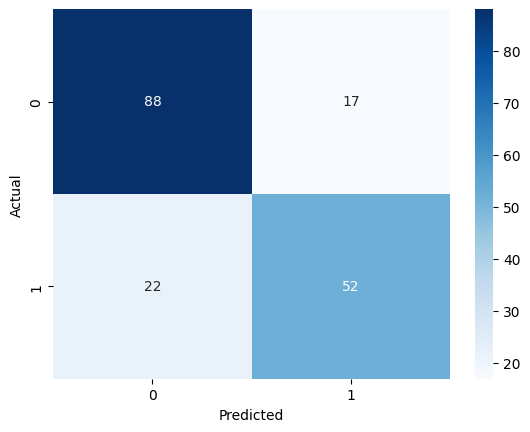

In [66]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [73]:
model.predict([[5,0]])

/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])